## Cell 1: Setup & Imports

In [26]:
# ============================================================
# SOCIAL MEDIA ADDICTION PREDICTION - COMPLETE ML PROJECT
# ============================================================
# This notebook contains:
# 1. Data Loading & Exploration
# 2. Feature Engineering
# 3. Preprocessing (Encoding, Scaling, Train/Test Split)
# 4. Model Training (Decision Tree, Naive Bayes, Neural Network, Linear Regression, K-Means)
# 5. Evaluation Metrics & Visualizations
# 6. Model Saving for Streamlit Interface

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve,
    mean_squared_error, mean_absolute_error, r2_score,
    silhouette_score, classification_report
)
import joblib
import os
import warnings
warnings.filterwarnings('ignore')

# Plotting settings
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
%matplotlib inline

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


## Cell 2: Load Data

In [27]:
# ============================================================
# 1. LOAD DATA
# ============================================================
df = pd.read_csv("archive/Students Social Media Addiction.csv")

print(f"Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nColumns:\n{list(df.columns)}")
print(f"\nMissing Values:\n{df.isnull().sum().sum()} total")
print(f"\nDuplicates: {df.duplicated().sum()}")

df.head()

Dataset Shape: 705 rows × 13 columns

Columns:
['Student_ID', 'Age', 'Gender', 'Academic_Level', 'Country', 'Avg_Daily_Usage_Hours', 'Most_Used_Platform', 'Affects_Academic_Performance', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Relationship_Status', 'Conflicts_Over_Social_Media', 'Addicted_Score']

Missing Values:
0 total

Duplicates: 0


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


## Cell 3: Initial Exploration

In [28]:
# ============================================================
# 2. DATA EXPLORATION
# ============================================================
print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)

# Basic stats
df.describe()

DATASET OVERVIEW


,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


## Cell 4: Exploration Visualizations

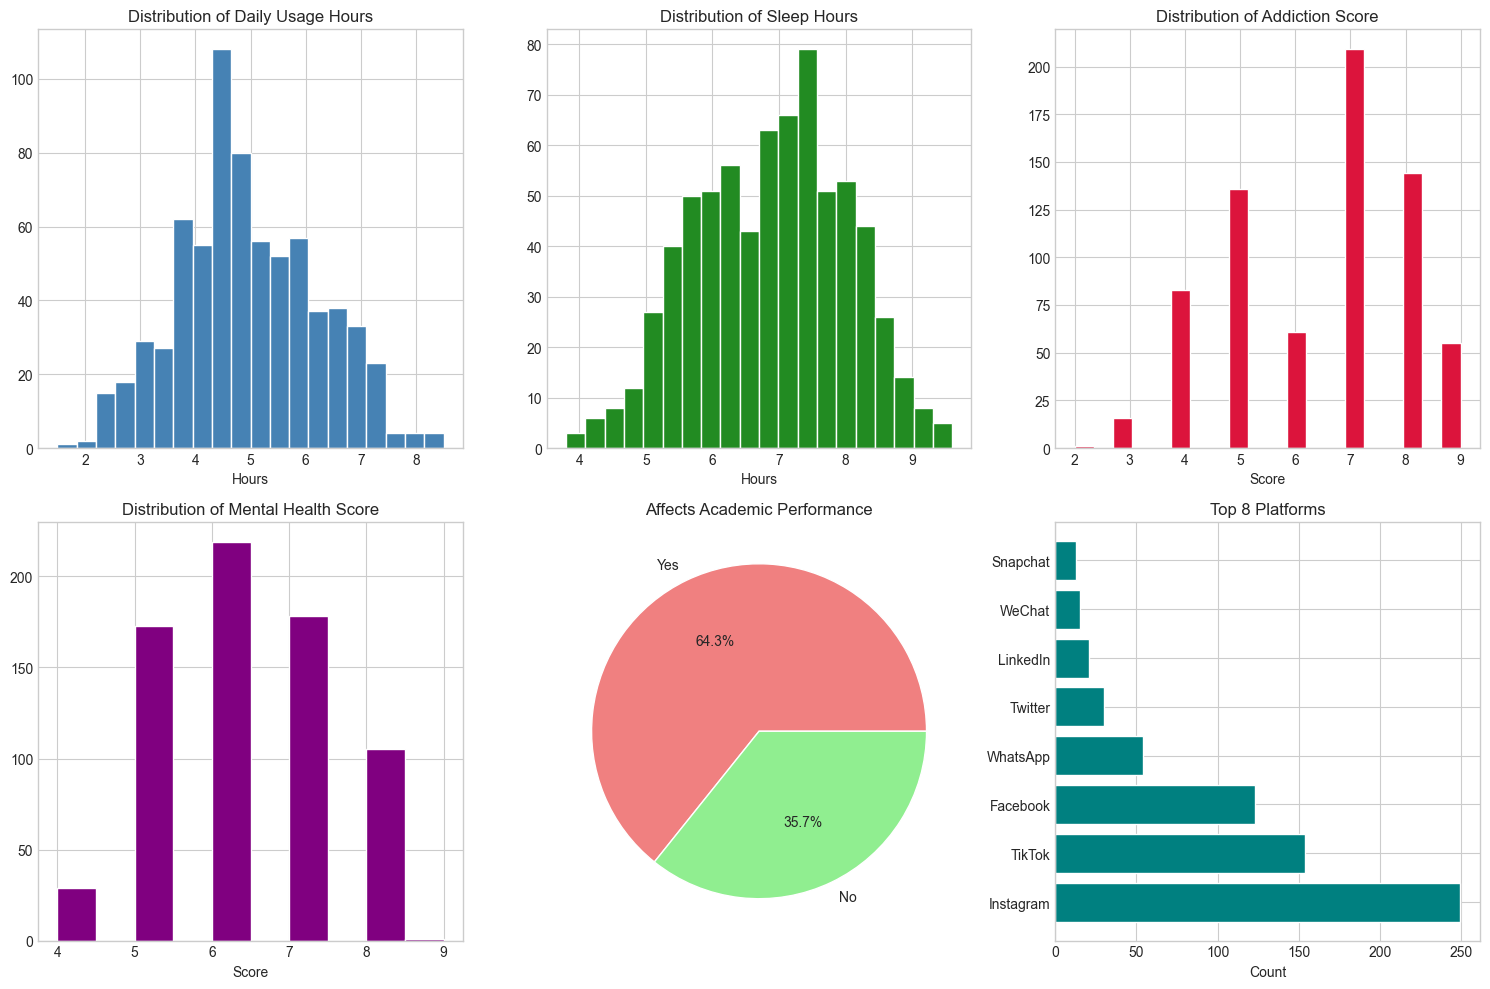

In [29]:
# Create visualizations folder if it doesn't exist
import os
os.makedirs('visualizations', exist_ok=True)

# Distribution of key variables
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Usage hours
axes[0, 0].hist(df['Avg_Daily_Usage_Hours'], bins=20, color='steelblue', edgecolor='white')
axes[0, 0].set_title('Distribution of Daily Usage Hours')
axes[0, 0].set_xlabel('Hours')

# Sleep hours
axes[0, 1].hist(df['Sleep_Hours_Per_Night'], bins=20, color='forestgreen', edgecolor='white')
axes[0, 1].set_title('Distribution of Sleep Hours')
axes[0, 1].set_xlabel('Hours')

# Addiction score
axes[0, 2].hist(df['Addicted_Score'], bins=20, color='crimson', edgecolor='white')
axes[0, 2].set_title('Distribution of Addiction Score')
axes[0, 2].set_xlabel('Score')

# Mental health
axes[1, 0].hist(df['Mental_Health_Score'], bins=10, color='purple', edgecolor='white')
axes[1, 0].set_title('Distribution of Mental Health Score')
axes[1, 0].set_xlabel('Score')

# Academic impact (pie)
impact_counts = df['Affects_Academic_Performance'].value_counts()
axes[1, 1].pie(impact_counts, labels=impact_counts.index, autopct='%1.1f%%',
               colors=['lightcoral', 'lightgreen'])
axes[1, 1].set_title('Affects Academic Performance')

# Platform distribution
platform_counts = df['Most_Used_Platform'].value_counts().head(8)
axes[1, 2].barh(platform_counts.index, platform_counts.values, color='teal')
axes[1, 2].set_title('Top 8 Platforms')
axes[1, 2].set_xlabel('Count')

plt.tight_layout()
plt.savefig('visualizations/data_exploration.png', dpi=150, bbox_inches='tight')
plt.show()

## Cell 5: Correlation Analysis

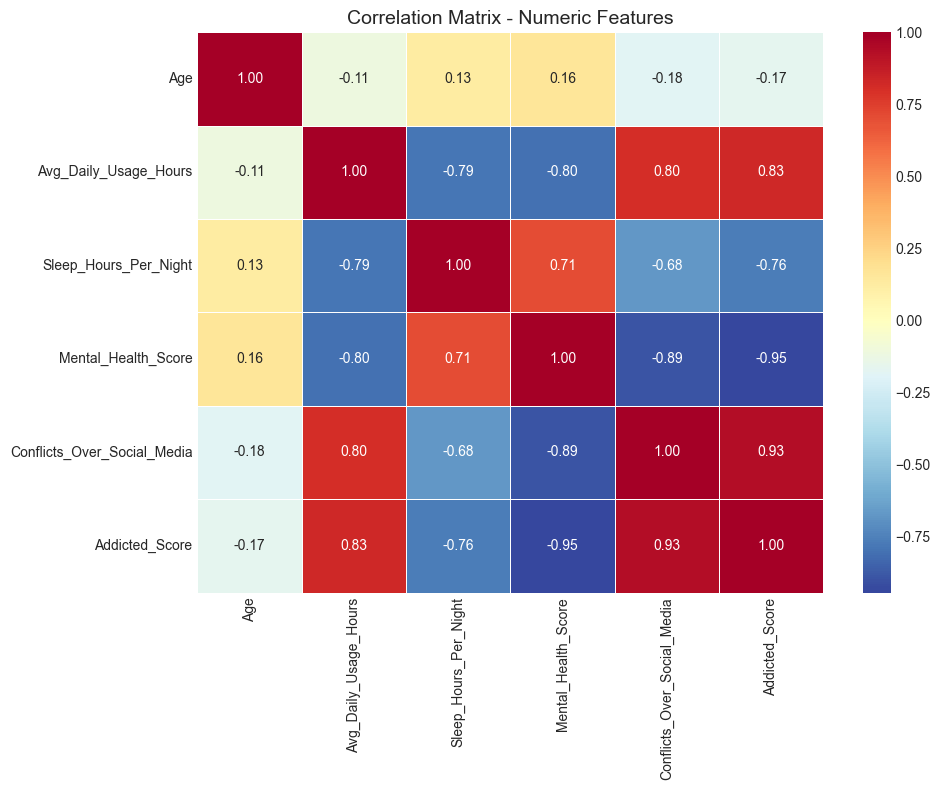


Key Correlations with Addicted_Score:
Addicted_Score                 1.000000
Conflicts_Over_Social_Media    0.933586
Avg_Daily_Usage_Hours          0.832000
Age                           -0.166396
Sleep_Hours_Per_Night         -0.764858
Mental_Health_Score           -0.945051
Name: Addicted_Score, dtype: float64


In [30]:
# Correlation heatmap (numeric columns only)
numeric_cols = ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night',
                'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']

fig, ax = plt.subplots(figsize=(10, 8))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0,
            fmt='.2f', linewidths=0.5, ax=ax)
ax.set_title('Correlation Matrix - Numeric Features', fontsize=14)
plt.tight_layout()
plt.savefig('visualizations/correlation_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nKey Correlations with Addicted_Score:")
print(correlation_matrix['Addicted_Score'].sort_values(ascending=False))

## Cell 6: Feature Engineering

In [31]:
# ============================================================
# 3. FEATURE ENGINEERING
# ============================================================
print("=" * 60)
print("FEATURE ENGINEERING")
print("=" * 60)

# Drop Student_ID (not a feature)
df = df.drop(columns=['Student_ID'])
print("✓ Dropped Student_ID")

# 3.1 Region from Country
try:
    import country_converter as coco
    fallback_map = {
        'UAE': 'Western Asia', 'UK': 'Northern Europe',
        'South Korea': 'Eastern Asia', 'Vietnam': 'South-eastern Asia',
        'Palestine': 'Western Asia'
    }
    df['Region'] = coco.convert(names=df['Country'].tolist(), to='UNregion', not_found=None)
    for idx in df[df['Region'].isna()].index:
        country = df.loc[idx, 'Country']
        df.loc[idx, 'Region'] = fallback_map.get(country, 'Other')
    print("✓ Region created from Country")
except ImportError:
    print("⚠ country_converter not installed; using 'Global' for all")
    df['Region'] = 'Global'

# 3.2 Sleep Deficit
df['Sleep_Deficit'] = np.maximum(0, 8 - df['Sleep_Hours_Per_Night'])
print("✓ Sleep_Deficit created (hours below 8)")

# 3.3 Usage-Sleep Ratio
df['Usage_Sleep_Ratio'] = df['Avg_Daily_Usage_Hours'] / (df['Sleep_Hours_Per_Night'] + 0.1)
print("✓ Usage_Sleep_Ratio created")

# 3.4 Relationship Strain Index
relationship_weights = {'Single': 1.0, 'In Relationship': 1.5, 'Complicated': 2.0}
df['Relationship_Strain'] = df.apply(
    lambda row: row['Conflicts_Over_Social_Media'] * relationship_weights.get(row['Relationship_Status'], 1.0),
    axis=1
)
print("✓ Relationship_Strain created")

# 3.5 Addiction Risk Score (composite)
df['Usage_Norm'] = (df['Avg_Daily_Usage_Hours'] - df['Avg_Daily_Usage_Hours'].min()) / \
                   (df['Avg_Daily_Usage_Hours'].max() - df['Avg_Daily_Usage_Hours'].min())
df['Sleep_Deficit_Norm'] = (df['Sleep_Deficit'] - df['Sleep_Deficit'].min()) / \
                           (df['Sleep_Deficit'].max() - df['Sleep_Deficit'].min() + 0.001)
df['Conflict_Norm'] = (df['Conflicts_Over_Social_Media'] - df['Conflicts_Over_Social_Media'].min()) / \
                      (df['Conflicts_Over_Social_Media'].max() - df['Conflicts_Over_Social_Media'].min())
df['Mental_Health_Inv_Norm'] = 1 - ((df['Mental_Health_Score'] - df['Mental_Health_Score'].min()) / \
                                    (df['Mental_Health_Score'].max() - df['Mental_Health_Score'].min()))

df['Addiction_Risk_Score'] = (
    0.35 * df['Usage_Norm'] +
    0.25 * df['Sleep_Deficit_Norm'] +
    0.20 * df['Conflict_Norm'] +
    0.20 * df['Mental_Health_Inv_Norm']
)
print("✓ Addiction_Risk_Score created (composite)")

# Drop helper columns
df = df.drop(columns=['Usage_Norm', 'Sleep_Deficit_Norm', 'Conflict_Norm', 'Mental_Health_Inv_Norm'])

print(f"\n✓ Total columns after engineering: {df.shape[1]}")
print(f"New features: Region, Sleep_Deficit, Usage_Sleep_Ratio, Relationship_Strain, Addiction_Risk_Score")

UAE not found in ISO3


FEATURE ENGINEERING
✓ Dropped Student_ID


UAE not found in ISO3
UAE not found in ISO3
UAE not found in ISO3
UAE not found in ISO3
UAE not found in ISO3
UAE not found in ISO3
UAE not found in ISO3


✓ Region created from Country
✓ Sleep_Deficit created (hours below 8)
✓ Usage_Sleep_Ratio created
✓ Relationship_Strain created
✓ Addiction_Risk_Score created (composite)

✓ Total columns after engineering: 17
New features: Region, Sleep_Deficit, Usage_Sleep_Ratio, Relationship_Strain, Addiction_Risk_Score


## Cell 7: Define Targets

In [32]:
# ============================================================
# 4. DEFINE TARGETS
# ============================================================
print("=" * 60)
print("TARGET VARIABLES")
print("=" * 60)

# Classification target
y_class = (df['Affects_Academic_Performance'] == 'Yes').astype(int)
print(f"\n✓ Classification Target: Affects_Academic_Performance")
print(f"  Class 0 (No):  {(y_class == 0).sum()} ({(y_class == 0).mean()*100:.1f}%)")
print(f"  Class 1 (Yes): {(y_class == 1).sum()} ({(y_class == 1).mean()*100:.1f}%)")

# Regression target
y_reg = df['Addicted_Score'].copy()
print(f"\n✓ Regression Target: Addicted_Score")
print(f"  Mean: {y_reg.mean():.2f}, Std: {y_reg.std():.2f}, Range: [{y_reg.min()}, {y_reg.max()}]")

TARGET VARIABLES

✓ Classification Target: Affects_Academic_Performance
  Class 0 (No):  252 (35.7%)
  Class 1 (Yes): 453 (64.3%)

✓ Regression Target: Addicted_Score
  Mean: 6.44, Std: 1.59, Range: [2, 9]


## Cell 8: Prepare Features

In [33]:
# ============================================================
# 5. PREPARE FEATURE MATRICES
# ============================================================
print("=" * 60)
print("FEATURE PREPARATION")
print("=" * 60)

# Feature columns for classification
feature_cols = [
    'Age', 'Gender', 'Academic_Level', 'Country',
    'Avg_Daily_Usage_Hours', 'Most_Used_Platform',
    'Sleep_Hours_Per_Night', 'Mental_Health_Score',
    'Relationship_Status', 'Conflicts_Over_Social_Media',
    'Region', 'Sleep_Deficit', 'Usage_Sleep_Ratio',
    'Relationship_Strain', 'Addiction_Risk_Score'
]

# For regression, add Affects_Academic_Performance as feature
feature_cols_reg = feature_cols + ['Affects_Academic_Performance']

X_class_raw = df[feature_cols].copy()
X_reg_raw = df[feature_cols_reg].copy()

print(f"✓ Classification features: {len(feature_cols)}")
print(f"✓ Regression features: {len(feature_cols_reg)}")

# Define categorical and numeric columns
categorical_cols = ['Gender', 'Academic_Level', 'Country',
                    'Most_Used_Platform', 'Relationship_Status', 'Region']
categorical_cols_reg = categorical_cols + ['Affects_Academic_Performance']

numeric_cols = ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night',
                'Mental_Health_Score', 'Conflicts_Over_Social_Media',
                'Sleep_Deficit', 'Usage_Sleep_Ratio', 'Relationship_Strain',
                'Addiction_Risk_Score']

print(f"\n✓ Categorical columns: {len(categorical_cols)}")
print(f"✓ Numeric columns: {len(numeric_cols)}")

FEATURE PREPARATION
✓ Classification features: 15
✓ Regression features: 16

✓ Categorical columns: 6
✓ Numeric columns: 9


## Cell 9: Encoding

In [34]:
# ============================================================
# 6. CATEGORICAL ENCODING
# ============================================================
print("=" * 60)
print("ENCODING")
print("=" * 60)

# ONE-HOT ENCODING (for Naive Bayes, Neural Network, Linear Regression)
X_class_onehot = pd.get_dummies(X_class_raw, columns=categorical_cols, drop_first=True)
X_reg_onehot = pd.get_dummies(X_reg_raw, columns=categorical_cols_reg, drop_first=True)

print(f"✓ One-hot encoded (Classification): {X_class_onehot.shape[1]} features")
print(f"✓ One-hot encoded (Regression): {X_reg_onehot.shape[1]} features")

# LABEL ENCODING (for Decision Tree)
X_class_label = X_class_raw.copy()
X_reg_label = X_reg_raw.copy()

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_class_label[col] = le.fit_transform(X_class_label[col])
    X_reg_label[col] = le.fit_transform(X_reg_label[col])
    label_encoders[col] = le

# Encode Affects_Academic_Performance for regression
le_aap = LabelEncoder()
X_reg_label['Affects_Academic_Performance'] = le_aap.fit_transform(X_reg_label['Affects_Academic_Performance'])
label_encoders['Affects_Academic_Performance'] = le_aap

print(f"✓ Label encoded: {len(label_encoders)} encoders saved")

ENCODING
✓ One-hot encoded (Classification): 152 features
✓ One-hot encoded (Regression): 153 features
✓ Label encoded: 7 encoders saved


## Cell 10: Train/Test Split

In [35]:
# ============================================================
# 7. TRAIN/TEST SPLIT
# ============================================================
print("=" * 60)
print("TRAIN/TEST SPLIT (70/30)")
print("=" * 60)

RANDOM_STATE = 42
TEST_SIZE = 0.3

# Classification (one-hot)
X_train_oh, X_test_oh, y_train_class, y_test_class = train_test_split(
    X_class_onehot, y_class, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y_class
)

# Classification (label-encoded for Decision Tree)
X_train_lbl, X_test_lbl, _, _ = train_test_split(
    X_class_label, y_class, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y_class
)

# Regression (one-hot)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg_onehot, y_reg, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

print(f"✓ Classification - Train: {X_train_oh.shape}, Test: {X_test_oh.shape}")
print(f"✓ Regression - Train: {X_train_reg.shape}, Test: {X_test_reg.shape}")
print(f"\n✓ Class distribution preserved (stratified split)")

TRAIN/TEST SPLIT (70/30)
✓ Classification - Train: (493, 152), Test: (212, 152)
✓ Regression - Train: (493, 153), Test: (212, 153)

✓ Class distribution preserved (stratified split)


## Cell 11: Scaling

In [36]:
# ============================================================
# 8. FEATURE SCALING
# ============================================================
print("=" * 60)
print("FEATURE SCALING (StandardScaler)")
print("=" * 60)

# Scale classification data
scaler_class = StandardScaler()
X_train_oh[numeric_cols] = scaler_class.fit_transform(X_train_oh[numeric_cols])
X_test_oh[numeric_cols] = scaler_class.transform(X_test_oh[numeric_cols])
print("✓ Classification features scaled")

# Scale regression data
scaler_reg = StandardScaler()
X_train_reg[numeric_cols] = scaler_reg.fit_transform(X_train_reg[numeric_cols])
X_test_reg[numeric_cols] = scaler_reg.transform(X_test_reg[numeric_cols])
print("✓ Regression features scaled")

# Prepare K-Means data (numeric only, full dataset)
kmeans_cols = ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night',
               'Mental_Health_Score', 'Conflicts_Over_Social_Media',
               'Addicted_Score', 'Sleep_Deficit', 'Usage_Sleep_Ratio',
               'Relationship_Strain', 'Addiction_Risk_Score']

X_kmeans = df[kmeans_cols].copy()
scaler_kmeans = StandardScaler()
X_kmeans_scaled = pd.DataFrame(
    scaler_kmeans.fit_transform(X_kmeans),
    columns=kmeans_cols,
    index=X_kmeans.index
)
print(f"✓ K-Means data prepared: {X_kmeans_scaled.shape}")

print("\n✓ PREPROCESSING COMPLETE!")

FEATURE SCALING (StandardScaler)
✓ Classification features scaled
✓ Regression features scaled
✓ K-Means data prepared: (705, 10)

✓ PREPROCESSING COMPLETE!


## Cell 12: Decision Tree Training

In [37]:
# ============================================================
# 9. MODEL 1: DECISION TREE CLASSIFIER
# ============================================================
print("=" * 60)
print("DECISION TREE CLASSIFIER")
print("=" * 60)

dt_model = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=RANDOM_STATE
)

dt_model.fit(X_train_lbl, y_train_class)
y_pred_dt = dt_model.predict(X_test_lbl)
y_prob_dt = dt_model.predict_proba(X_test_lbl)[:, 1]

# Metrics
dt_accuracy = accuracy_score(y_test_class, y_pred_dt)
dt_precision = precision_score(y_test_class, y_pred_dt)
dt_recall = recall_score(y_test_class, y_pred_dt)
dt_f1 = f1_score(y_test_class, y_pred_dt)
dt_auc = roc_auc_score(y_test_class, y_prob_dt)

print(f"\n✓ Model trained successfully")
print(f"\nClassification Report:")
print(classification_report(y_test_class, y_pred_dt, target_names=['No', 'Yes']))

print(f"ROC-AUC Score: {dt_auc:.4f}")

# Store results
dt_results = {
    'accuracy': dt_accuracy, 'precision': dt_precision,
    'recall': dt_recall, 'f1': dt_f1, 'auc': dt_auc,
    'y_pred': y_pred_dt, 'y_prob': y_prob_dt
}

DECISION TREE CLASSIFIER

✓ Model trained successfully

Classification Report:
              precision    recall  f1-score   support

          No       1.00      1.00      1.00        76
         Yes       1.00      1.00      1.00       136

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

ROC-AUC Score: 1.0000


## Cell 13: Decision Tree Visualization

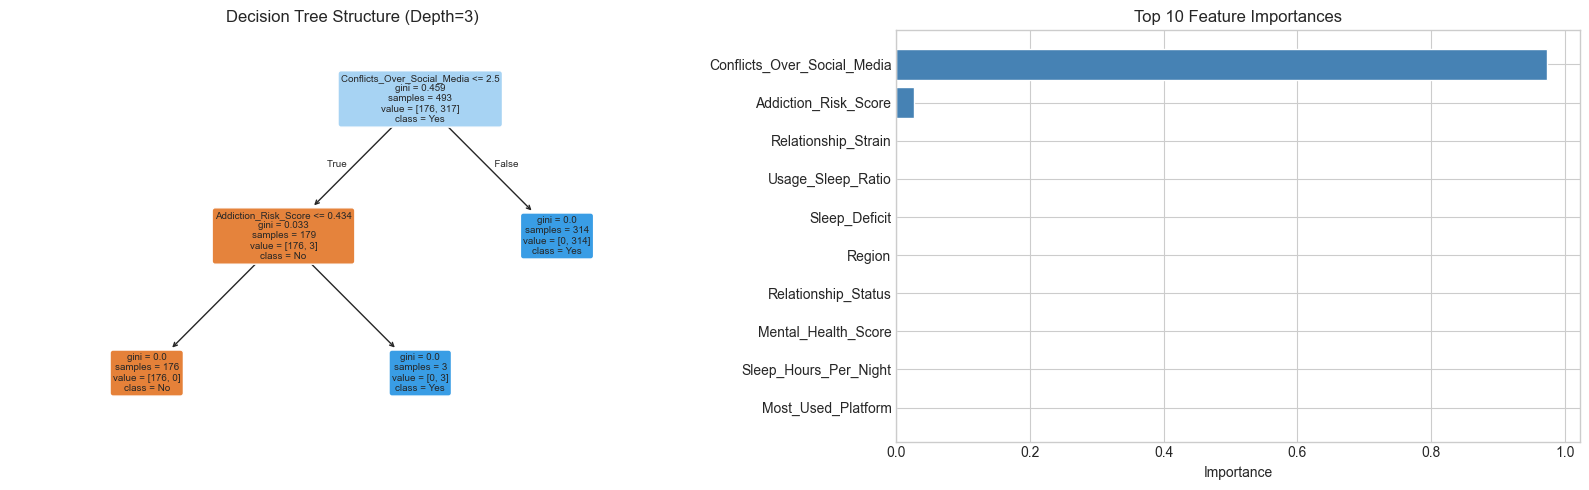


Top 5 Most Important Features:
  Conflicts_Over_Social_Media: 0.9739
  Addiction_Risk_Score: 0.0261
  Relationship_Strain: 0.0000
  Usage_Sleep_Ratio: 0.0000
  Sleep_Deficit: 0.0000


In [38]:
# Decision Tree Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Tree structure (limited depth)
plt.subplot(1, 2, 1)
plot_tree(dt_model, max_depth=3, filled=True, rounded=True,
          feature_names=X_train_lbl.columns.tolist(),
          class_names=['No', 'Yes'], fontsize=7)
plt.title('Decision Tree Structure (Depth=3)')

# Feature importance
importance_df = pd.DataFrame({
    'Feature': X_train_lbl.columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=True).tail(10)

plt.subplot(1, 2, 2)
plt.barh(importance_df['Feature'], importance_df['Importance'], color='steelblue')
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances')

plt.tight_layout()
plt.savefig('visualizations/decision_tree_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nTop 5 Most Important Features:")
for _, row in importance_df.tail(5).iloc[::-1].iterrows():
    print(f"  {row['Feature']}: {row['Importance']:.4f}")

## Cell 14: Naive Bayes Training

In [39]:
# ============================================================
# 10. MODEL 2: NAIVE BAYES CLASSIFIER
# ============================================================
print("=" * 60)
print("NAIVE BAYES CLASSIFIER (Gaussian)")
print("=" * 60)

nb_model = GaussianNB()
nb_model.fit(X_train_oh, y_train_class)
y_pred_nb = nb_model.predict(X_test_oh)
y_prob_nb = nb_model.predict_proba(X_test_oh)[:, 1]

# Metrics
nb_accuracy = accuracy_score(y_test_class, y_pred_nb)
nb_precision = precision_score(y_test_class, y_pred_nb)
nb_recall = recall_score(y_test_class, y_pred_nb)
nb_f1 = f1_score(y_test_class, y_pred_nb)
nb_auc = roc_auc_score(y_test_class, y_prob_nb)

print(f"\n✓ Model trained successfully")
print(f"\nClassification Report:")
print(classification_report(y_test_class, y_pred_nb, target_names=['No', 'Yes']))

print(f"ROC-AUC Score: {nb_auc:.4f}")

nb_results = {
    'accuracy': nb_accuracy, 'precision': nb_precision,
    'recall': nb_recall, 'f1': nb_f1, 'auc': nb_auc,
    'y_pred': y_pred_nb, 'y_prob': y_prob_nb
}

NAIVE BAYES CLASSIFIER (Gaussian)

✓ Model trained successfully

Classification Report:
              precision    recall  f1-score   support

          No       0.62      0.97      0.76        76
         Yes       0.98      0.67      0.79       136

    accuracy                           0.78       212
   macro avg       0.80      0.82      0.78       212
weighted avg       0.85      0.78      0.78       212

ROC-AUC Score: 0.9528


## Cell 15: Neural Network Training

NEURAL NETWORK CLASSIFIER (MLP)

✓ Model trained successfully
  Architecture: Input(152) → 32 → 16 → Output(2)
  Iterations: 29

Classification Report:
              precision    recall  f1-score   support

          No       0.94      0.99      0.96        76
         Yes       0.99      0.96      0.98       136

    accuracy                           0.97       212
   macro avg       0.96      0.98      0.97       212
weighted avg       0.97      0.97      0.97       212

ROC-AUC Score: 0.9982


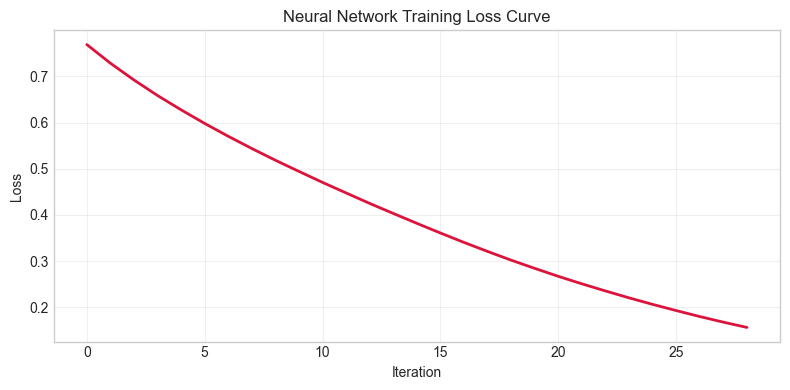

In [40]:
# ============================================================
# 11. MODEL 3: NEURAL NETWORK (MLP)
# ============================================================
print("=" * 60)
print("NEURAL NETWORK CLASSIFIER (MLP)")
print("=" * 60)

nn_model = MLPClassifier(
    hidden_layer_sizes=(32, 16),
    activation='relu',
    max_iter=500,
    random_state=RANDOM_STATE,
    early_stopping=True,
    validation_fraction=0.1,
    verbose=False
)

nn_model.fit(X_train_oh, y_train_class)
y_pred_nn = nn_model.predict(X_test_oh)
y_prob_nn = nn_model.predict_proba(X_test_oh)[:, 1]

# Metrics
nn_accuracy = accuracy_score(y_test_class, y_pred_nn)
nn_precision = precision_score(y_test_class, y_pred_nn)
nn_recall = recall_score(y_test_class, y_pred_nn)
nn_f1 = f1_score(y_test_class, y_pred_nn)
nn_auc = roc_auc_score(y_test_class, y_prob_nn)

print(f"\n✓ Model trained successfully")
print(f"  Architecture: Input({X_train_oh.shape[1]}) → 32 → 16 → Output(2)")
print(f"  Iterations: {nn_model.n_iter_}")
print(f"\nClassification Report:")
print(classification_report(y_test_class, y_pred_nn, target_names=['No', 'Yes']))

print(f"ROC-AUC Score: {nn_auc:.4f}")

nn_results = {
    'accuracy': nn_accuracy, 'precision': nn_precision,
    'recall': nn_recall, 'f1': nn_f1, 'auc': nn_auc,
    'y_pred': y_pred_nn, 'y_prob': y_prob_nn
}

# Loss curve
plt.figure(figsize=(8, 4))
plt.plot(nn_model.loss_curve_, color='crimson', linewidth=2)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Neural Network Training Loss Curve')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('visualizations/nn_loss_curve.png', dpi=150, bbox_inches='tight')
plt.show()

## Cell 16: Classification Comparison Visualizations

CLASSIFICATION MODELS COMPARISON


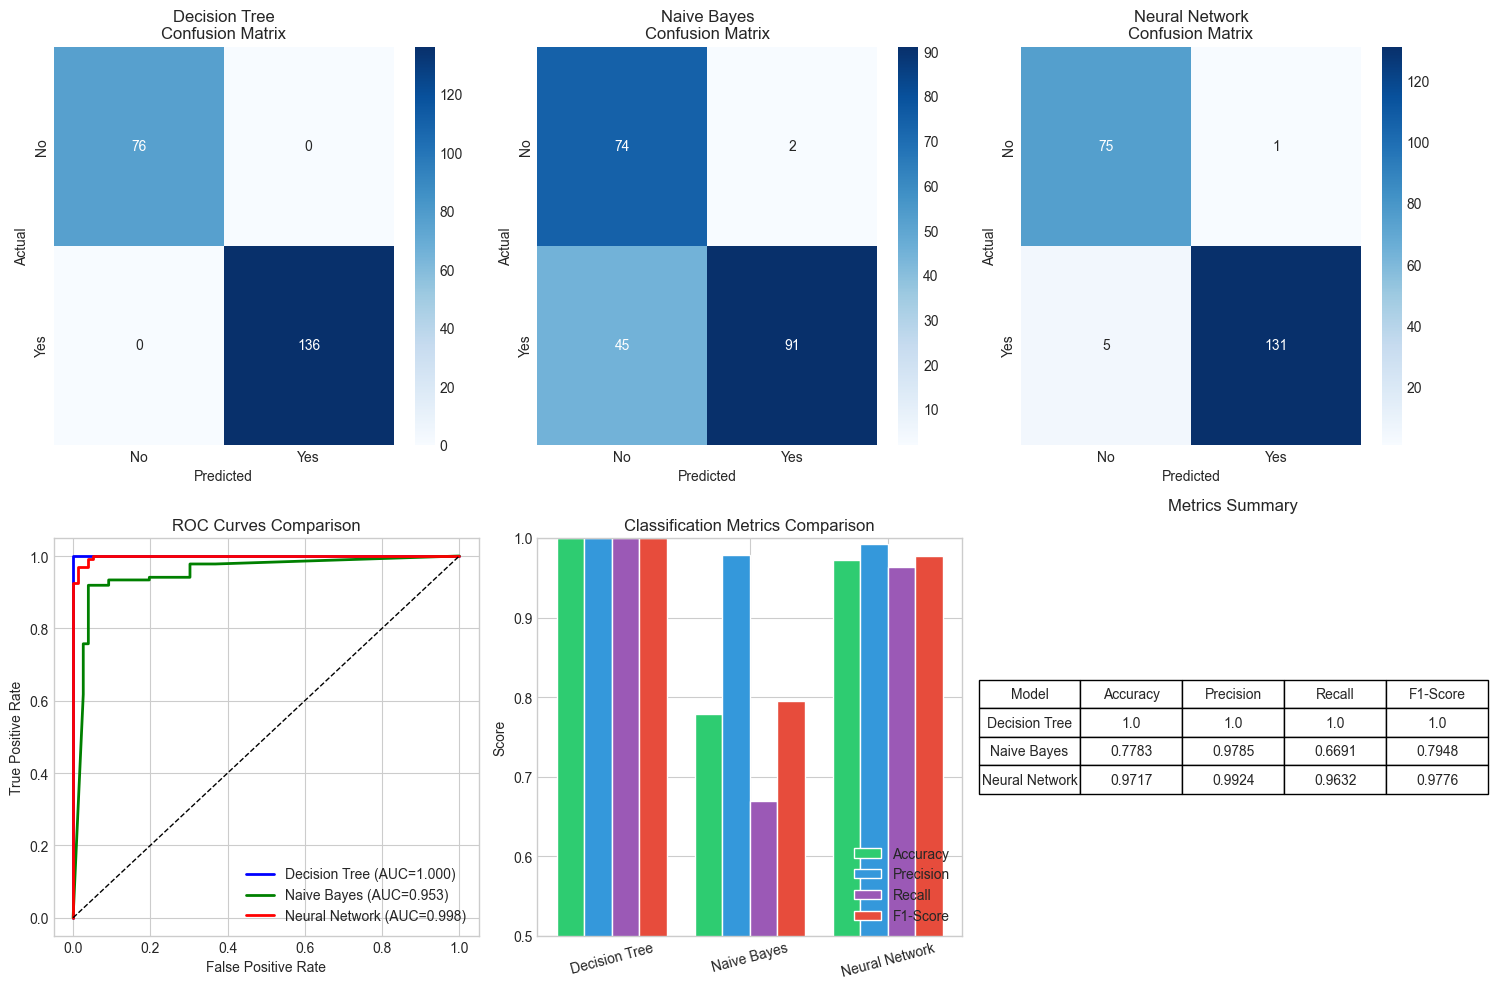


Classification Results Summary:
         Model  Accuracy  Precision   Recall  F1-Score
 Decision Tree  1.000000   1.000000 1.000000  1.000000
   Naive Bayes  0.778302   0.978495 0.669118  0.794760
Neural Network  0.971698   0.992424 0.963235  0.977612


In [41]:
# ============================================================
# 12. CLASSIFICATION MODELS COMPARISON
# ============================================================
print("=" * 60)
print("CLASSIFICATION MODELS COMPARISON")
print("=" * 60)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Row 1: Confusion Matrices
models_class = [
    ('Decision Tree', y_pred_dt),
    ('Naive Bayes', y_pred_nb),
    ('Neural Network', y_pred_nn)
]

for idx, (name, y_pred) in enumerate(models_class):
    cm = confusion_matrix(y_test_class, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, idx],
                xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    axes[0, idx].set_title(f'{name}\nConfusion Matrix')
    axes[0, idx].set_xlabel('Predicted')
    axes[0, idx].set_ylabel('Actual')

# Row 2: ROC Curves (combined) + Metrics comparison
# ROC Curves
ax_roc = axes[1, 0]
for name, y_prob, color in [('Decision Tree', y_prob_dt, 'blue'),
                             ('Naive Bayes', y_prob_nb, 'green'),
                             ('Neural Network', y_prob_nn, 'red')]:
    fpr, tpr, _ = roc_curve(y_test_class, y_prob)
    auc_score = roc_auc_score(y_test_class, y_prob)
    ax_roc.plot(fpr, tpr, color=color, linewidth=2, label=f'{name} (AUC={auc_score:.3f})')

ax_roc.plot([0, 1], [0, 1], 'k--', linewidth=1)
ax_roc.set_xlabel('False Positive Rate')
ax_roc.set_ylabel('True Positive Rate')
ax_roc.set_title('ROC Curves Comparison')
ax_roc.legend(loc='lower right')

# Metrics bar chart
metrics_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Naive Bayes', 'Neural Network'],
    'Accuracy': [dt_accuracy, nb_accuracy, nn_accuracy],
    'Precision': [dt_precision, nb_precision, nn_precision],
    'Recall': [dt_recall, nb_recall, nn_recall],
    'F1-Score': [dt_f1, nb_f1, nn_f1]
})

ax_bar = axes[1, 1]
x = np.arange(3)
width = 0.2
colors = ['#2ecc71', '#3498db', '#9b59b6', '#e74c3c']

for i, metric in enumerate(['Accuracy', 'Precision', 'Recall', 'F1-Score']):
    ax_bar.bar(x + i*width, metrics_df[metric], width, label=metric, color=colors[i])

ax_bar.set_xticks(x + 1.5*width)
ax_bar.set_xticklabels(metrics_df['Model'], rotation=15)
ax_bar.set_ylabel('Score')
ax_bar.set_title('Classification Metrics Comparison')
ax_bar.legend(loc='lower right')
ax_bar.set_ylim([0.5, 1.0])

# Summary table
axes[1, 2].axis('off')
table_data = metrics_df.round(4).values.tolist()
table = axes[1, 2].table(
    cellText=table_data,
    colLabels=metrics_df.columns,
    loc='center',
    cellLoc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)
axes[1, 2].set_title('Metrics Summary', pad=20)

plt.tight_layout()
plt.savefig('visualizations/classification_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

# Print summary
print("\nClassification Results Summary:")
print(metrics_df.to_string(index=False))

## Cell 17: Linear Regression Training

LINEAR REGRESSION (Predicting Addicted_Score)

✓ Model trained successfully

Regression Metrics:
  MSE:  0.0926
  RMSE: 0.3042
  MAE:  0.2166
  R²:   0.9635


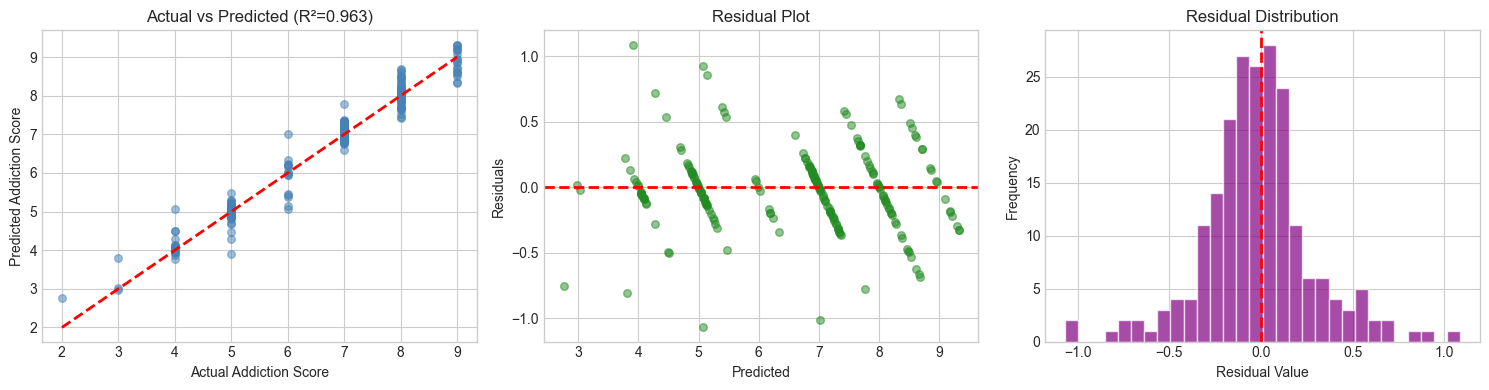


Top 10 Features by Coefficient Magnitude:
                         Feature  Coefficient
                Country_Slovakia    -0.982102
                  Country_Kuwait    -0.960945
                 Country_Uruguay     0.916982
                  Country_Bhutan    -0.832542
                  Country_Serbia     0.728858
Affects_Academic_Performance_Yes     0.728468
             Country_South Korea    -0.607727
                  Country_Israel     0.601814
                Country_Slovenia    -0.579719
             Mental_Health_Score    -0.554146


In [42]:
# ============================================================
# 13. MODEL 4: LINEAR REGRESSION
# ============================================================
print("=" * 60)
print("LINEAR REGRESSION (Predicting Addicted_Score)")
print("=" * 60)

lr_model = LinearRegression()
lr_model.fit(X_train_reg, y_train_reg)
y_pred_lr = lr_model.predict(X_test_reg)

# Metrics
lr_mse = mean_squared_error(y_test_reg, y_pred_lr)
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test_reg, y_pred_lr)
lr_r2 = r2_score(y_test_reg, y_pred_lr)

print(f"\n✓ Model trained successfully")
print(f"\nRegression Metrics:")
print(f"  MSE:  {lr_mse:.4f}")
print(f"  RMSE: {lr_rmse:.4f}")
print(f"  MAE:  {lr_mae:.4f}")
print(f"  R²:   {lr_r2:.4f}")

lr_results = {
    'mse': lr_mse, 'rmse': lr_rmse, 'mae': lr_mae, 'r2': lr_r2,
    'y_pred': y_pred_lr
}

# Regression visualizations
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Actual vs Predicted
axes[0].scatter(y_test_reg, y_pred_lr, alpha=0.5, s=30, color='steelblue')
axes[0].plot([y_test_reg.min(), y_test_reg.max()],
             [y_test_reg.min(), y_test_reg.max()], 'r--', linewidth=2)
axes[0].set_xlabel('Actual Addiction Score')
axes[0].set_ylabel('Predicted Addiction Score')
axes[0].set_title(f'Actual vs Predicted (R²={lr_r2:.3f})')

# Residuals
residuals = y_test_reg - y_pred_lr
axes[1].scatter(y_pred_lr, residuals, alpha=0.5, s=30, color='forestgreen')
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot')

# Residual distribution
axes[2].hist(residuals, bins=30, color='purple', edgecolor='white', alpha=0.7)
axes[2].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[2].set_xlabel('Residual Value')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Residual Distribution')

plt.tight_layout()
plt.savefig('visualizations/linear_regression_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

# Top coefficients
coef_df = pd.DataFrame({
    'Feature': X_train_reg.columns,
    'Coefficient': lr_model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("\nTop 10 Features by Coefficient Magnitude:")
print(coef_df.head(10).to_string(index=False))

## Cell 18: K-Means Clustering

In [43]:
# ============================================================
# 14. MODEL 5: K-MEANS CLUSTERING
# ============================================================
print("=" * 60)
print("K-MEANS CLUSTERING")
print("=" * 60)

# Find optimal K
inertias = []
silhouettes = []
K_range = range(2, 11)

for k in K_range:
    km_temp = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=10)
    km_temp.fit(X_kmeans_scaled)
    inertias.append(km_temp.inertia_)
    silhouettes.append(silhouette_score(X_kmeans_scaled, km_temp.labels_))

optimal_k = K_range[np.argmax(silhouettes)]
print(f"\n✓ Optimal K by Silhouette Score: {optimal_k}")
print(f"  Best Silhouette Score: {max(silhouettes):.4f}")

# Train final model
kmeans_model = KMeans(n_clusters=optimal_k, random_state=RANDOM_STATE, n_init=10)
clusters = kmeans_model.fit_predict(X_kmeans_scaled)

km_silhouette = silhouette_score(X_kmeans_scaled, clusters)
print(f"\n✓ Final Model Trained")
print(f"  Silhouette Score: {km_silhouette:.4f}")
print(f"  Inertia: {kmeans_model.inertia_:.2f}")

# Cluster distribution
print(f"\nCluster Distribution:")
unique, counts = np.unique(clusters, return_counts=True)
for c, n in zip(unique, counts):
    print(f"  Cluster {c}: {n} students ({100*n/len(clusters):.1f}%)")

km_results = {
    'silhouette': km_silhouette,
    'inertia': kmeans_model.inertia_,
    'n_clusters': optimal_k,
    'clusters': clusters
}

K-MEANS CLUSTERING

✓ Optimal K by Silhouette Score: 2
  Best Silhouette Score: 0.4440

✓ Final Model Trained
  Silhouette Score: 0.4440
  Inertia: 3156.67

Cluster Distribution:
  Cluster 0: 343 students (48.7%)
  Cluster 1: 362 students (51.3%)


## Cell 19: K-Means Visualizations

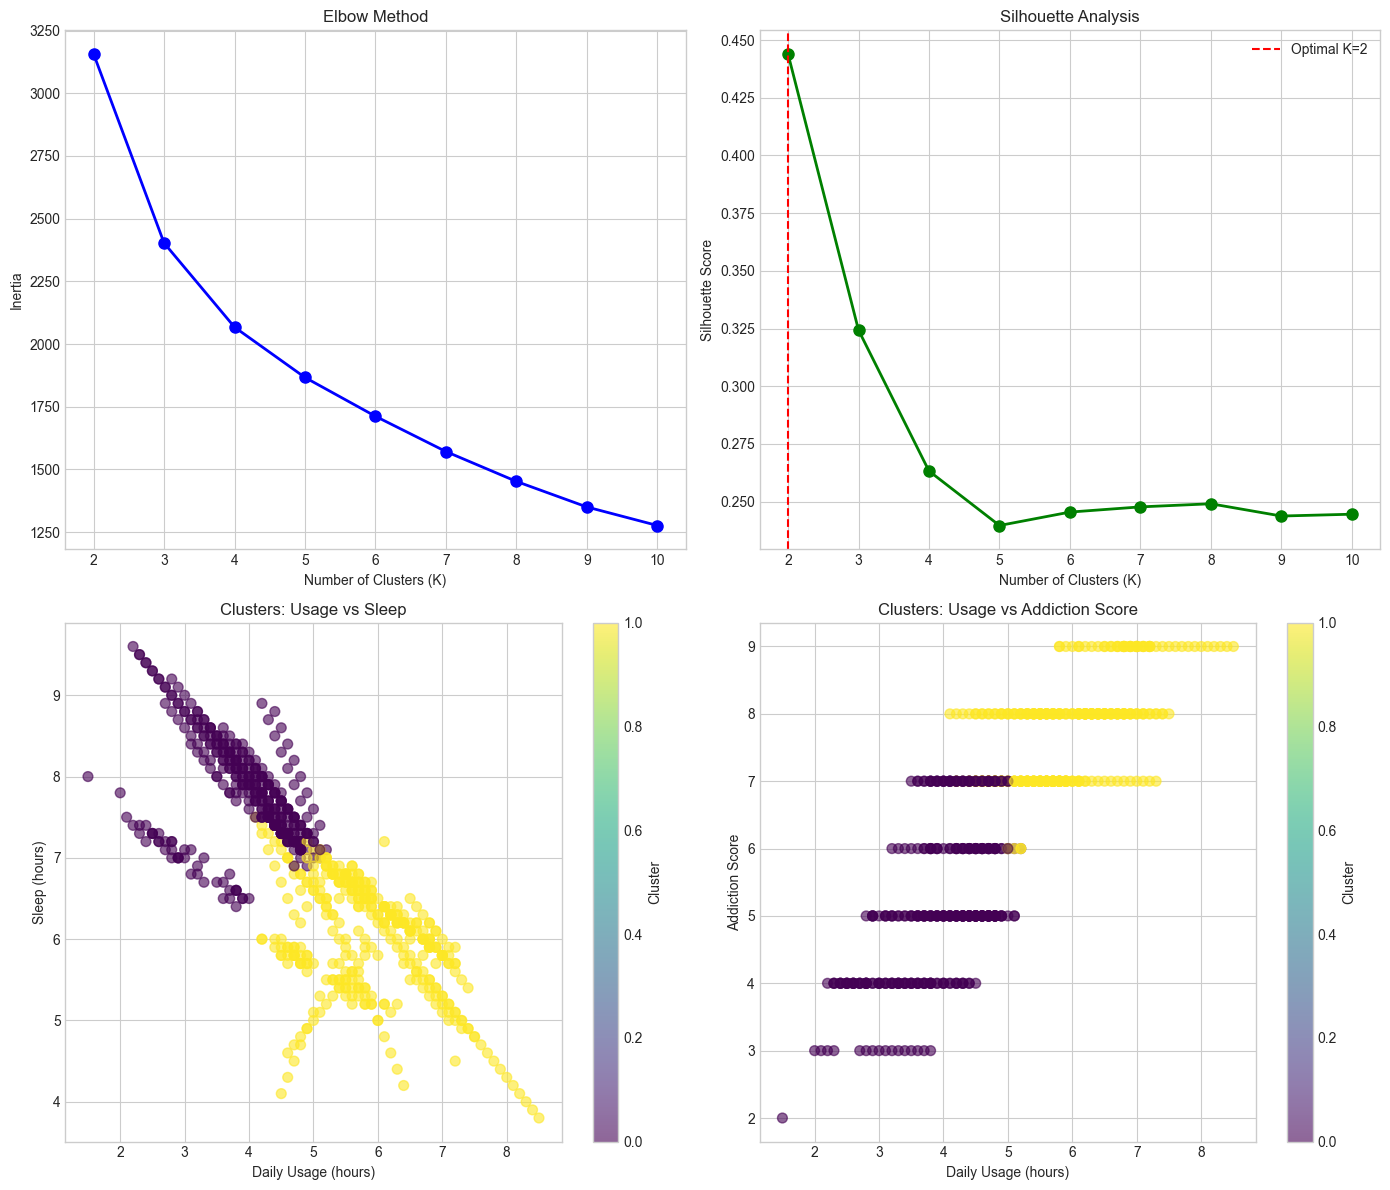


Cluster Profiles (Mean Values):
         Avg_Daily_Usage_Hours  Sleep_Hours_Per_Night  Addicted_Score  Mental_Health_Score  Conflicts_Over_Social_Media
Cluster                                                                                                                
0                         3.93                   7.80            5.12                 7.12                         2.10
1                         5.86                   5.99            7.69                 5.38                         3.56


In [44]:
# K-Means Visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Elbow plot
axes[0, 0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0, 0].set_xlabel('Number of Clusters (K)')
axes[0, 0].set_ylabel('Inertia')
axes[0, 0].set_title('Elbow Method')
axes[0, 0].set_xticks(list(K_range))

# Silhouette plot
axes[0, 1].plot(K_range, silhouettes, 'go-', linewidth=2, markersize=8)
axes[0, 1].axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal K={optimal_k}')
axes[0, 1].set_xlabel('Number of Clusters (K)')
axes[0, 1].set_ylabel('Silhouette Score')
axes[0, 1].set_title('Silhouette Analysis')
axes[0, 1].set_xticks(list(K_range))
axes[0, 1].legend()

# Cluster scatter: Usage vs Sleep
scatter1 = axes[1, 0].scatter(
    df['Avg_Daily_Usage_Hours'], df['Sleep_Hours_Per_Night'],
    c=clusters, cmap='viridis', alpha=0.6, s=50
)
axes[1, 0].set_xlabel('Daily Usage (hours)')
axes[1, 0].set_ylabel('Sleep (hours)')
axes[1, 0].set_title('Clusters: Usage vs Sleep')
plt.colorbar(scatter1, ax=axes[1, 0], label='Cluster')

# Cluster scatter: Usage vs Addiction
scatter2 = axes[1, 1].scatter(
    df['Avg_Daily_Usage_Hours'], df['Addicted_Score'],
    c=clusters, cmap='viridis', alpha=0.6, s=50
)
axes[1, 1].set_xlabel('Daily Usage (hours)')
axes[1, 1].set_ylabel('Addiction Score')
axes[1, 1].set_title('Clusters: Usage vs Addiction Score')
plt.colorbar(scatter2, ax=axes[1, 1], label='Cluster')

plt.tight_layout()
plt.savefig('visualizations/kmeans_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

# Cluster profiles
print("\nCluster Profiles (Mean Values):")
df_with_clusters = df.copy()
df_with_clusters['Cluster'] = clusters

cluster_profile = df_with_clusters.groupby('Cluster')[
    ['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Addicted_Score',
     'Mental_Health_Score', 'Conflicts_Over_Social_Media']
].mean().round(2)

print(cluster_profile.to_string())

## Cell 20: Save Models

In [45]:
# ============================================================
# 15. SAVE MODELS & ARTIFACTS
# ============================================================
print("=" * 60)
print("SAVING MODELS & ARTIFACTS")
print("=" * 60)

# Create directories
os.makedirs('models', exist_ok=True)
os.makedirs('visualizations', exist_ok=True)

# Save models
joblib.dump(dt_model, 'models/decision_tree_model.pkl')
joblib.dump(nb_model, 'models/naive_bayes_model.pkl')
joblib.dump(nn_model, 'models/neural_network_model.pkl')
joblib.dump(lr_model, 'models/linear_regression_model.pkl')
joblib.dump(kmeans_model, 'models/kmeans_model.pkl')
print("✓ Models saved")

# Save scalers
joblib.dump(scaler_class, 'models/scaler_class.pkl')
joblib.dump(scaler_reg, 'models/scaler_reg.pkl')
joblib.dump(scaler_kmeans, 'models/scaler_kmeans.pkl')
print("✓ Scalers saved")

# Save encoders
joblib.dump(label_encoders, 'models/label_encoders.pkl')
print("✓ Label encoders saved")

# Save feature information
feature_info = {
    'X_class_columns': X_train_oh.columns.tolist(),
    'X_reg_columns': X_train_reg.columns.tolist(),
    'kmeans_columns': kmeans_cols,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols
}
joblib.dump(feature_info, 'models/feature_info.pkl')
print("✓ Feature info saved")

print("\n" + "=" * 60)
print("ALL MODELS SAVED SUCCESSFULLY!")
print("=" * 60)
print("\nFiles created:")
print("  models/decision_tree_model.pkl")
print("  models/naive_bayes_model.pkl")
print("  models/neural_network_model.pkl")
print("  models/linear_regression_model.pkl")
print("  models/kmeans_model.pkl")
print("  models/scaler_class.pkl")
print("  models/scaler_reg.pkl")
print("  models/scaler_kmeans.pkl")
print("  models/label_encoders.pkl")
print("  models/feature_info.pkl")

SAVING MODELS & ARTIFACTS
✓ Models saved
✓ Scalers saved
✓ Label encoders saved
✓ Feature info saved

ALL MODELS SAVED SUCCESSFULLY!

Files created:
  models/decision_tree_model.pkl
  models/naive_bayes_model.pkl
  models/neural_network_model.pkl
  models/linear_regression_model.pkl
  models/kmeans_model.pkl
  models/scaler_class.pkl
  models/scaler_reg.pkl
  models/scaler_kmeans.pkl
  models/label_encoders.pkl
  models/feature_info.pkl


## Cell 21: Final Summary

In [46]:
# ============================================================
# 16. FINAL PROJECT SUMMARY
# ============================================================
print("=" * 70)
print("PROJECT SUMMARY")
print("=" * 70)

print("\n📊 DATASET:")
print(f"  • Samples: {len(df)}")
print(f"  • Features (after engineering): {len(feature_cols)}")
print(f"  • New features created: 5 (Region, Sleep_Deficit, Usage_Sleep_Ratio,")
print(f"                            Relationship_Strain, Addiction_Risk_Score)")

print("\n🎯 CLASSIFICATION (Target: Affects_Academic_Performance)")
print(f"  {'Model':<20} {'Accuracy':<12} {'F1-Score':<12} {'ROC-AUC':<12}")
print(f"  {'-'*56}")
print(f"  {'Decision Tree':<20} {dt_accuracy:<12.4f} {dt_f1:<12.4f} {dt_auc:<12.4f}")
print(f"  {'Naive Bayes':<20} {nb_accuracy:<12.4f} {nb_f1:<12.4f} {nb_auc:<12.4f}")
print(f"  {'Neural Network':<20} {nn_accuracy:<12.4f} {nn_f1:<12.4f} {nn_auc:<12.4f}")

print("\n📈 REGRESSION (Target: Addicted_Score)")
print(f"  Linear Regression: R²={lr_r2:.4f}, RMSE={lr_rmse:.4f}, MAE={lr_mae:.4f}")

print("\n👥 CLUSTERING")
print(f"  K-Means (K={optimal_k}): Silhouette Score={km_silhouette:.4f}")

print("\n✅ NEXT STEP:")
print("  Run the Streamlit app: streamlit run streamlit_app.py")
print("=" * 70)

PROJECT SUMMARY

📊 DATASET:
  • Samples: 705
  • Features (after engineering): 15
  • New features created: 5 (Region, Sleep_Deficit, Usage_Sleep_Ratio,
                            Relationship_Strain, Addiction_Risk_Score)

🎯 CLASSIFICATION (Target: Affects_Academic_Performance)
  Model                Accuracy     F1-Score     ROC-AUC     
  --------------------------------------------------------
  Decision Tree        1.0000       1.0000       1.0000      
  Naive Bayes          0.7783       0.7948       0.9528      
  Neural Network       0.9717       0.9776       0.9982      

📈 REGRESSION (Target: Addicted_Score)
  Linear Regression: R²=0.9635, RMSE=0.3042, MAE=0.2166

👥 CLUSTERING
  K-Means (K=2): Silhouette Score=0.4440

✅ NEXT STEP:
  Run the Streamlit app: streamlit run streamlit_app.py
